In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("MaternalHealthRisk.xls")

In [3]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [4]:
df.shape

(1014, 7)

In [5]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [7]:
df["RiskLevel"] = df['RiskLevel'].map({"high risk":2,"low risk":0,"mid risk":1})

In [8]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2
1010,55,120,90,18.0,98.0,60,2
1011,35,85,60,19.0,98.0,86,2
1012,43,120,90,18.0,98.0,70,2


In [9]:
df.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,29.194690,110.553097,75.418142,8.346173,98.692478,73.949115,0.730088
std,13.767379,17.872282,13.754578,2.829209,1.410897,8.156973,0.833169
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,0.000000
25%,19.000000,90.000000,65.000000,6.900000,98.000000,70.000000,0.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000,0.000000
75%,35.000000,120.000000,86.000000,7.900000,98.000000,80.000000,1.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,2.000000


In [12]:
# the function that helps in identifying the dataset

def outlier_identification(column):
    q1 = np.percentile(column,25)
    q3 = np.percentile(column,75)
    iqr = q3-q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    return [lower_bound,upper_bound]

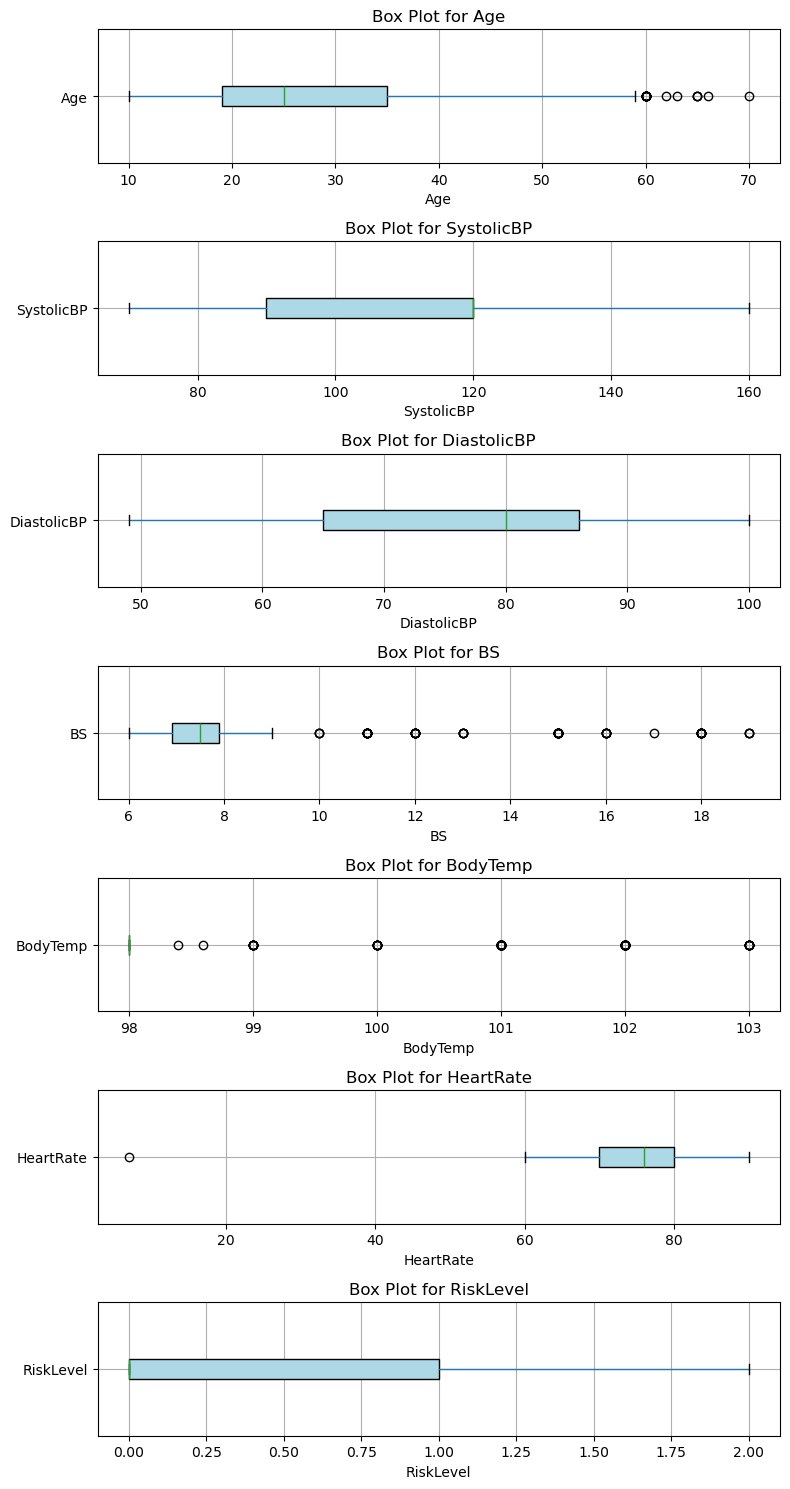

In [13]:
num_columns = len(df.columns)
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(8,15))

# Plot each column in a separate subplot
for i, column in enumerate(df.columns):
    df.boxplot(column=column, ax=axes[i], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_xlabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

In [14]:
lst_age = outlier_identification(df['Age'])
df[df['Age']>lst_age[1]] 

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
36,60,120,80,6.1,98.0,75,0
54,60,90,65,7.0,98.0,77,0
91,60,120,85,15.0,98.0,60,1
99,60,90,65,6.8,98.0,77,1
114,63,140,90,15.0,98.0,90,2
181,60,120,85,15.0,98.0,60,2
280,60,120,80,7.7,98.0,75,0
309,60,90,65,6.9,98.0,77,0
313,62,120,80,6.9,98.0,66,0
322,65,90,60,6.9,98.0,70,0


In [15]:
# lets check the lower and upper bounds of SystolicBP

In [16]:
lst_sys = outlier_identification(df['SystolicBP'])
df[df['SystolicBP']>lst_sys[1]]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel


In [17]:
lst_sys

[45.0, 165.0]

In [18]:
lst_BS = outlier_identification(df['BS'])
df[df['BS'] > lst_BS[1]]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
7,35,85,60,11.0,102.0,86,2
9,42,130,80,18.0,98.0,70,2
14,48,120,80,11.0,98.0,88,1
...,...,...,...,...,...,...,...
640,46,140,100,12.0,99.0,90,2
641,28,95,60,10.0,101.0,86,2
644,25,140,100,15.0,98.6,70,2
657,27,140,90,15.0,98.0,90,2


In [19]:
df[df['BS'] == 19]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
123,40,160,100,19.0,98.0,77,2
127,55,140,95,19.0,98.0,77,2
319,35,85,60,19.0,98.0,86,2


In [20]:
lst_heartrate = outlier_identification(df['HeartRate'])
df[df['HeartRate'] < lst_heartrate[0]]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
499,16,120,75,7.9,98.0,7,0


In [21]:
df = df[df['HeartRate'] > lst_heartrate[0]]

In [22]:
df[df['HeartRate']  > lst_heartrate[0]]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,1
674,15,100,60,6.0,98.0,80,0
703,15,100,49,7.6,98.0,77,0
704,12,100,50,6.0,98.0,70,1


In [23]:
# done with removal of outliers

In [24]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,1
674,15,100,60,6.0,98.0,80,0
703,15,100,49,7.6,98.0,77,0
704,12,100,50,6.0,98.0,70,1


<Axes: xlabel='RiskLevel'>

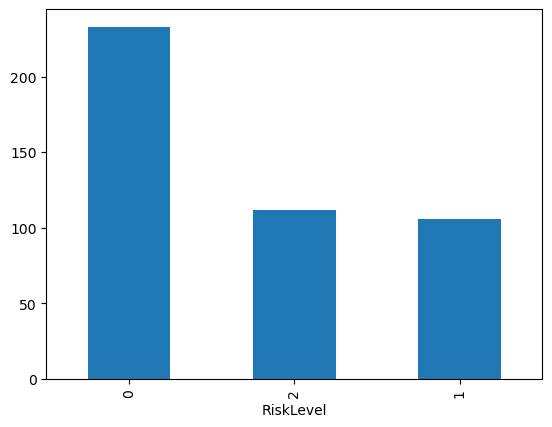

In [25]:
df['RiskLevel'].value_counts().plot(kind = "bar")

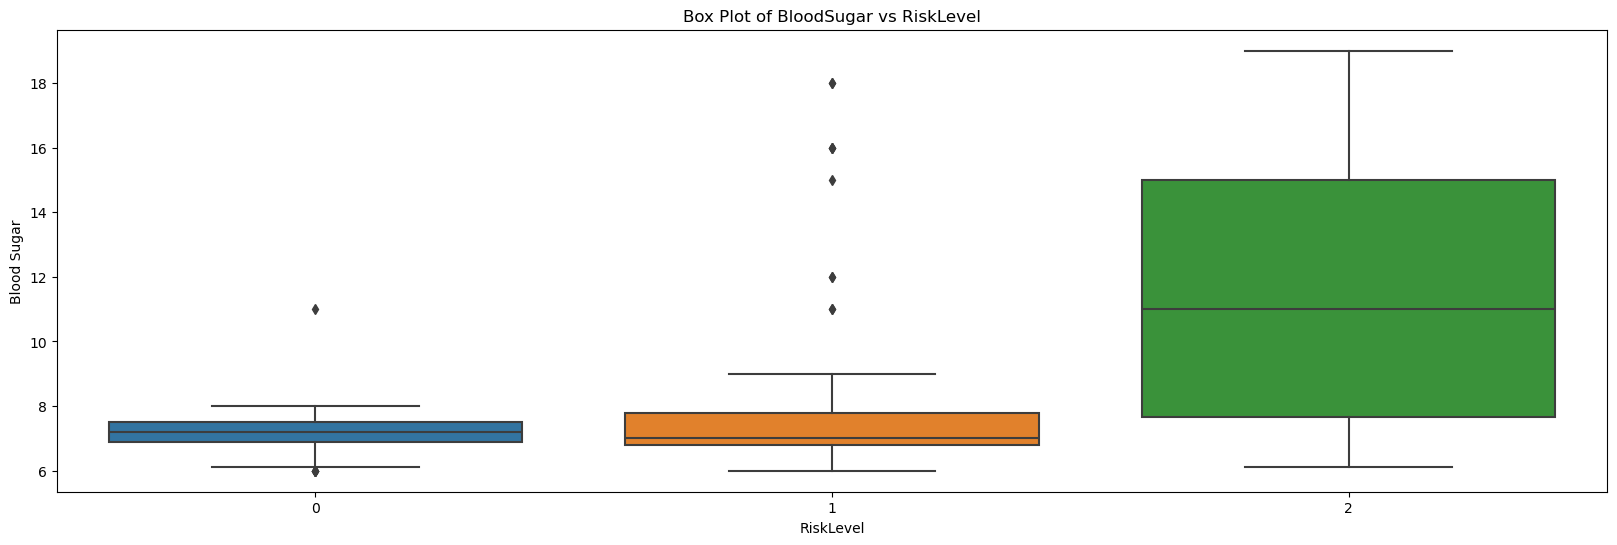

In [26]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='RiskLevel', y='BS', data=df)
plt.xlabel('RiskLevel')
plt.ylabel('Blood Sugar')
plt.title('Box Plot of BloodSugar vs RiskLevel')
plt.show()

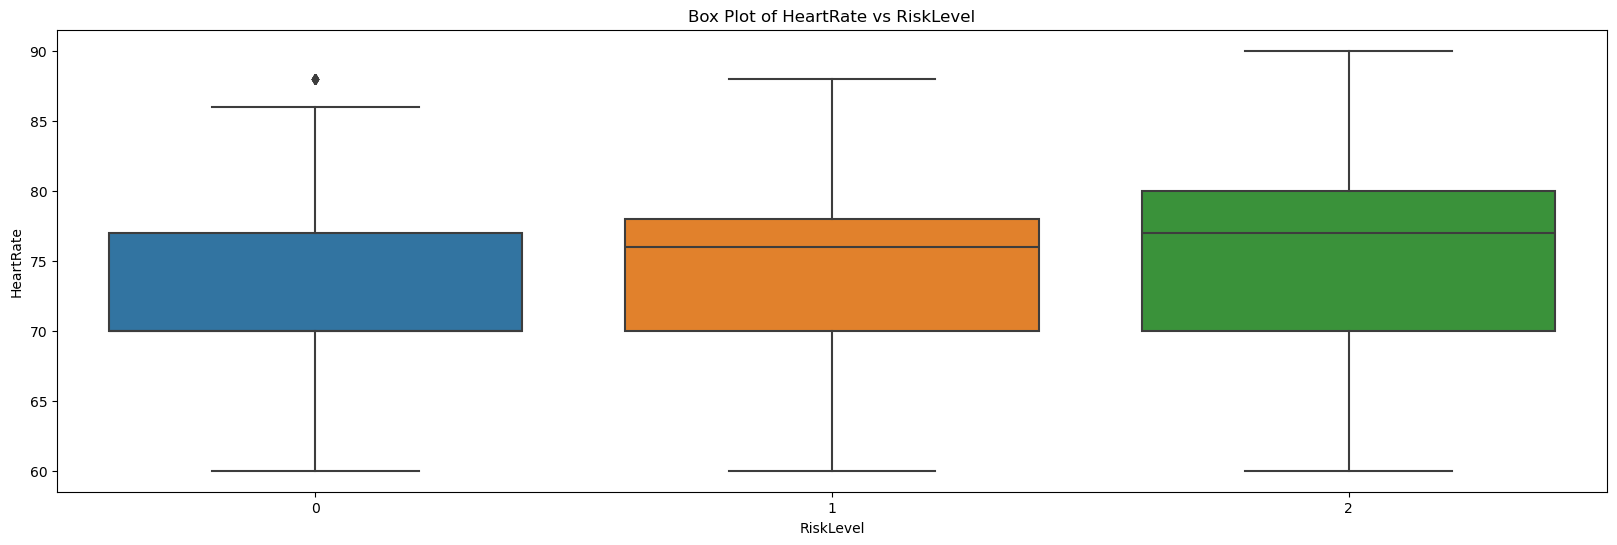

In [27]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='RiskLevel', y='HeartRate', data=df)
plt.xlabel('RiskLevel')
plt.ylabel('HeartRate')
plt.title('Box Plot of HeartRate vs RiskLevel')
plt.show()

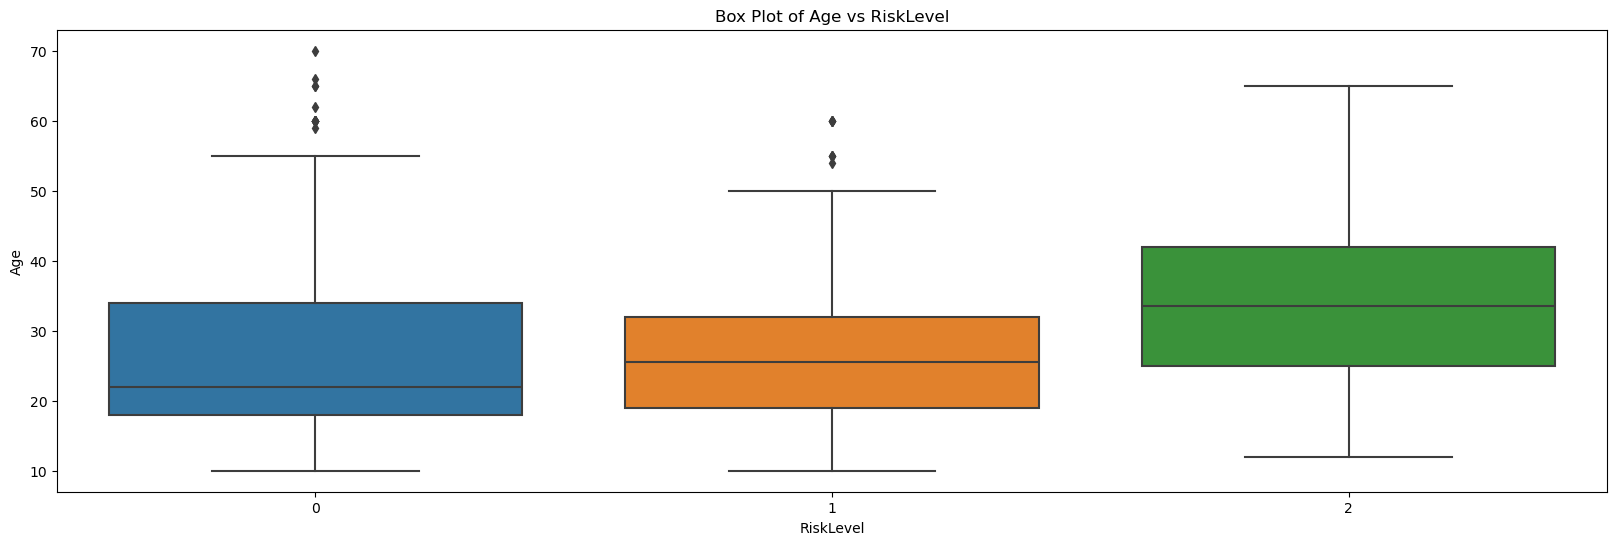

In [28]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='RiskLevel', y='Age', data=df)
plt.xlabel('RiskLevel')
plt.ylabel('Age')
plt.title('Box Plot of Age vs RiskLevel')
plt.show()

In [29]:
# from this it is evident that as the risk increases with increase in blood sugar, heart rate and age

In [30]:
df.corr()["RiskLevel"]

Age            0.181484
SystolicBP     0.328777
DiastolicBP    0.254398
BS             0.549064
BodyTemp       0.259035
HeartRate      0.181593
RiskLevel      1.000000
Name: RiskLevel, dtype: float64

<Axes: >

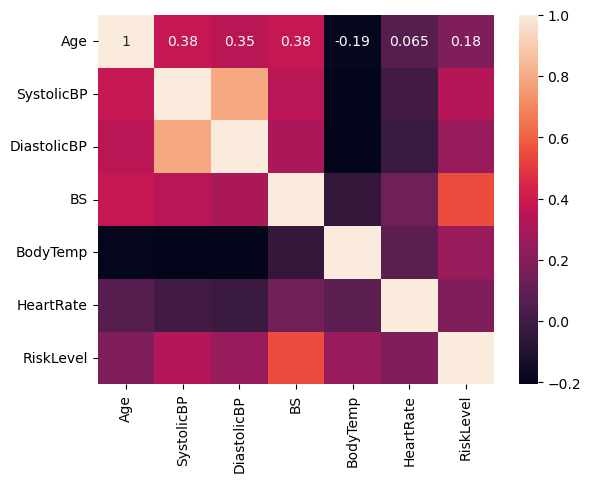

In [31]:
# plt.figure(figsize = (10,12))
sns.heatmap(df.corr(),annot = True)

In [32]:
df['SystolicBP'].corr(df['DiastolicBP'])

0.7902839642857676

In [33]:
from sklearn.model_selection import train_test_split
X = df.drop("RiskLevel",axis = 1)
y = df['RiskLevel']

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.7,stratify = y,random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr_model = LogisticRegression(max_iter = 600)
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)

print(accuracy)

0.6677215189873418


In [103]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(accuracy_knn)


0.6234177215189873


In [84]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy with best hyperparameters:", accuracy)


Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Accuracy with best hyperparameters: 0.6265822784810127


In [39]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')


Accuracy: 0.6139240506329114


In [88]:

dt_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Split quality function
    'splitter': ['best', 'random'],  # Split strategy
    'max_depth': [None, 5, 10, 15, 20],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
}
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_dt_model = grid_search.best_estimator_
y_pred = best_dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy with best hyperparameters: {accuracy}')


Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10, 'splitter': 'best'}
Accuracy with best hyperparameters: 0.6424050632911392


In [105]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)

print(f'Accuracy: {accuracy_nb}')


Accuracy: 0.6645569620253164


In [107]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')  
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f'Accuracy: {accuracy_svm}')


Accuracy: 0.6234177215189873


In [109]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],  # You can try other kernels like 'poly' and 'sigmoid'
    'gamma': ['scale', 'auto'],   # For 'rbf', 'poly', and 'sigmoid' kernels
    'degree': [3, 4, 5]  # Only for 'poly' kernel
}
svm_model = SVC()
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_svm_model = grid_search.best_estimator_

y_pred_svm = best_svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f'Accuracy: {accuracy_svm}')


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Accuracy: 0.629746835443038


In [111]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

adaboost_model.fit(X_train, y_train)

y_pred_adaboost = adaboost_model.predict(X_test)

accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)

print(f'Accuracy: {accuracy_adaboost}')


Accuracy: 0.5917721518987342


In [113]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1]
}

adaboost_model = AdaBoostClassifier(random_state=42)

grid_search = GridSearchCV(estimator=adaboost_model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

adaboost_best_model = grid_search.best_estimator_

y_pred_adaboost = adaboost_best_model.predict(X_test)

accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)

print(f'Accuracy: {accuracy_adaboost}')


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 0.6740506329113924


In [115]:
from xgboost import XGBClassifier

xgboost_model = XGBClassifier(n_estimators=50, random_state=42)

xgboost_model.fit(X_train, y_train)

y_pred_xgboost = xgboost_model.predict(X_test)

accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)

print(f'Accuracy: {accuracy_xgboost}')


Accuracy: 0.620253164556962


In [117]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

xgboost_model = XGBClassifier(random_state=42)

grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=2)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred_xgboost = best_model.predict(X_test)

accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy_xgboost}')


Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV]

### from all the above classifiers XGBoost have yeilded the maximum accuracy while tuned with the hyperparameters